# Part 1 - RGB Images

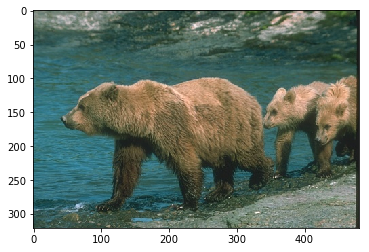

(321, 481, 3)

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os

# Path of images
path = 'C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs'

# Load image data
img_load = sio.loadmat(os.getcwd() + '/ImsAndSegs/ImsAndTruths100075.mat')
img = img_load['Im']
seg_im = img_load['Seg1']

# Plot image
plt.imshow(img)
plt.show()
img.shape

## K-Means Algorithm Implementation

In [2]:
import time
import numpy as np
from sklearn.cluster import KMeans
from skimage.transform import rescale

#Downsample image
img_r = rescale(img,0.1,mode='reflect')
img_flat = img_r.reshape(img_r.shape[0] * img_r.shape[1], 3)
n_clusters = 3 

t0 = time.time()
# Initializing KMeans
kmeans = KMeans(n_clusters = n_clusters)

# Fitting with inputs
kmeans = kmeans.fit(img_flat)
clusters = kmeans.cluster_centers_[kmeans.predict(img_flat)]
t1 = time.time()

# Reshape flattened image
img_clustered = clusters.reshape(img_r.shape)

# Plot image
plt.imshow(img_clustered)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

NameError: name 'img' is not defined

In [56]:
img_r = rescale(seg_im,0.1,mode='reflect')
print(img_r)
print(img_clustered)
martinIndex(img_r, img_clustered)

[[1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 [1.52590219e-05 1.52590219e-05 1.52590219e-05 ... 1.52590219e-05
  1.52590219e-05 1.52590219e-05]
 ...
 [1.67849241e-04 1.67849241e-04 1.67849241e-04 ... 2.13626307e-04
  2.13626307e-04 2.13626307e-04]
 [1.67849241e-04 1.67849241e-04 1.67849241e-04 ... 2.13626307e-04
  2.13626307e-04 2.13626307e-04]
 [1.67849241e-04 1.67849241e-04 1.67849241e-04 ... 2.13626307e-04
  2.13626307e-04 2.13626307e-04]]
[[[0.6067644  0.55364772 0.46094735]
  [0.26888301 0.40977178 0.38639886]
  [0.6067644  0.55364772 0.46094735]
  ...
  [0.26888301 0.40977178 0.38639886]
  [0.19330495 0.25758951 0.20628701]
  [0.26888301 0.40977178 0.38639886]]

 [[0.6067644  0.55364772 0.46094735]
  [0.6067644  0.55364772 0.46094735]
  [0.6067644  0.55364772 0.46094735]
  ...
  [0.19330495 0.25758951 0.20628701]
  [0.19330495 0.

0.8608490215463664

#### The big issue here is the illumination, which is a big problem for machine learning

## Self-Organizing Map Algorithm Implementation

Self-Organizing Map clustering time to do: 0.03s


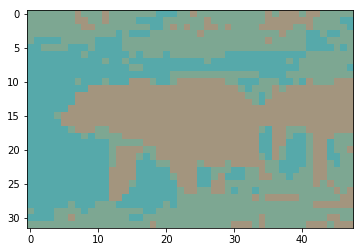

In [43]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt


# Reshaping the pixels matrix and rescaling
img_r = rescale(img,0.1,mode='reflect')
img_flat = np.reshape(img_r, (img_r.shape[0]*img_r.shape[1], 3))

n_clusters = 3

t0 = time.time()
#Uses MiniSOM algorithm to do SOM
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(img_flat)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(img_flat, 100)

qnt = som.quantization(img_flat)  # quantize each pixels of the image
clustered = np.zeros(img_r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img_r.shape[0], img_r.shape[1]))] = q
t1 = time.time()


plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()



## Fuzzy C-Means Algorithm Implementation

Fuzzy C-Means clustering time to do: 0.02s


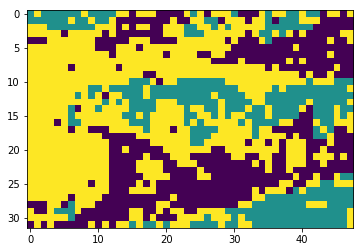

In [44]:
import skfuzzy
from skimage.transform import rescale
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img)

# Rescale and reshape data
img_r = rescale(img_gray,0.1,mode='reflect')
img_flat = img_r.reshape((1, -1))

n_clusters = 3

t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(img_flat, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()

#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = img_r.shape

# Plot Image
plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

## Spectral Clustering Algorithm Implementation

#### This one is based on the example - works but we lose the color data

Spectral clustering time to do: 0.24s


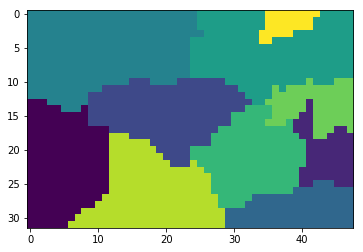

In [45]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img)

# Resize it to 10% of the original size to speed up the processing
img_gray = rescale(img_gray,0.1,mode='reflect')

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(img_gray)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
n_clusters = 10

t0 = time.time()
# Using discretized clustering
img_clustered = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
img_clustered = img_clustered.reshape(img_gray.shape)

title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(img_clustered)
plt.show()

### Gaussian Mixture Models

Gaussian Mixture Model clustering time to do: 0.03s


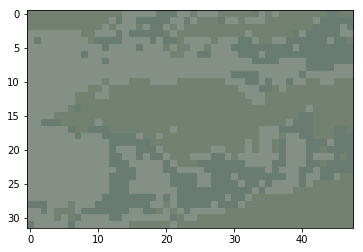

In [46]:
from sklearn import mixture

# Reshaping the image matrix
img_r = rescale(img,0.1,mode='reflect')
img_flat = np.reshape(img_r, (img_r.shape[0]*img_r.shape[1], 3))

n_clusters = 3

# Define model parameters
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')

t0 = time.time()
#Run algorithm
img_gmm = gmm.fit(img_flat)
img_clustered = img_flat[gmm.predict(img_flat)].astype(float)
t1 = time.time()

img_clustered.shape = img_r.shape

plt.imshow(img_clustered)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

# Part 2 - Hyperspectral Images

## Pavia and Santa Barbara Images

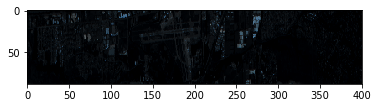

(88, 400, 3)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy.io as sio
import os


hsimg_load = sio.loadmat('SanBarHyperIm.mat')
hsimg_data = hsimg_load['SanBarIm88x400']
# hsimg_load = sio.loadmat('PaviaHyperIm.mat')
# hsimg_data = hsimg_load['PaviaHyperIm']
himage_display = hsimg_data[:,:,0:3]
plt.imshow(himage_display)
plt.show()
hsimg_data[:,:,0:3].shape

#### Number of component selection for PCA

We need about 3 components to retain 95% of the variance


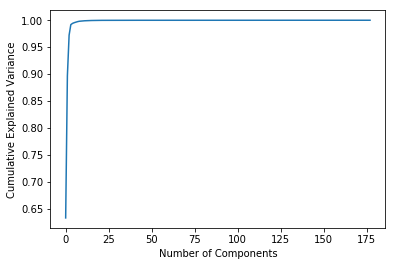

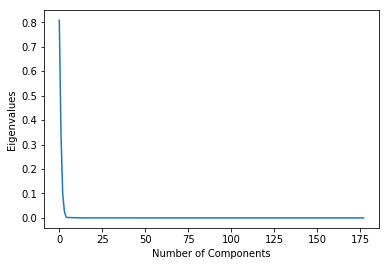

In [4]:
from sklearn.decomposition import PCA
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])
pca = PCA().fit(data)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

# Minumum Noise Factor --> Similar to PCA but removes noise from bands

#### Do PCA

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from skimage.transform import rescale
from sklearn.cluster import KMeans
import numpy as np
import time

#Reshape to 2D - one column per component
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

#Since my data is not between [0,1], I rescale the data
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

#Turn data back into 3 dimensions to control the downsampling of the data
reduced_data_3D = reduced_data_scaled .reshape(hsimg_data[:,:,0:3].shape)
img_r = rescale(reduced_data_3D,0.1,mode='reflect')

#Flatten my data agan for algorithm input
img_data = img_r.reshape(img_r.shape[0] * img_r.shape[1], 3)

### KMeans Algorithm

KMeans clustering time to do: 0.11s


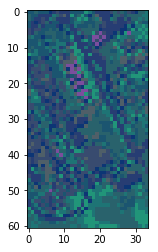

In [68]:
from sklearn.cluster import KMeans

n_clusters = 9

# Initializing KMeans
kmeans = KMeans(n_clusters=n_clusters)
# Fitting with inputs
t0 = time.time()

# Run algorithm
kmeans = kmeans.fit(img_data)
clusters = kmeans.cluster_centers_[kmeans.predict(img_data)]
t1 = time.time()

# Reshape the data into 3D
img_clustered = clusters.reshape(img_r.shape)

# Plot the data
plt.imshow(img_clustered)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### SOM Algorithm

Self-Organizing Map clustering time to do: 0.06s


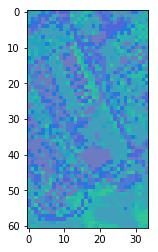

In [69]:
from minisom import MiniSom

n_clusters = 9

t0 = time.time()
#Run Algorithm
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(img_data)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(img_data, 100)

qnt = som.quantization(img_data)  # quantize each pixels of the image
clustered = np.zeros(img_r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img_r.shape[0], img_r.shape[1]))] = q
t1 = time.time()

# Plot image
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Fuzzy C-Means

Fuzzy C-Means clustering time to do: 0.12s


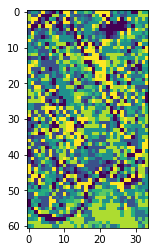

In [70]:
import skfuzzy
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
img_gray = rgb2gray(img_r)

# Reshape data
img_flat = img_gray.reshape((1, -1))

n_clusters = 9

t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(img_flat, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()

#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = img_gray.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Spectral Clustering Algorithm

Spectral clustering time to do: 0.24s


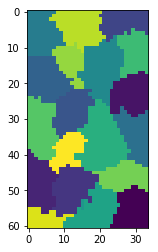

In [71]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


#Turn into grayscale
img_gray = rgb2gray(img_r)

graph = image.img_to_graph(img_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 20

t0 = time.time()
img_clustered = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
img_clustered = img_clustered.reshape(img_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(img_clustered)
plt.show()

### Gaussian Mixture Model Algorithm

Gaussian Mixture Model clustering time to do: 0.10s


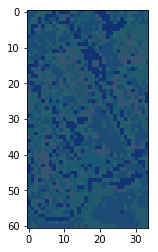

In [72]:
from sklearn import mixture

n_clusters = 9

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')

t0 = time.time()
# Run the algorithm
img_gmm = gmm.fit(img_data)
img_clustered = img_data[gmm.predict(img_data)].astype(float)
t1 = time.time()

# Reshape the data
img_clustered.shape = img_r.shape

# Plot the data
plt.imshow(img_clustered)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

# Full  Wrapper Code

In [80]:
import numpy as np
import scipy.io as sio
import time
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from minisom import MiniSom
import skfuzzy
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn import mixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from skimage.transform import rescale


def MyKmeans8(Image, ImageType, NumClusts):
    image_ = sio.loadmat(Image)
    im = image_['Im']
    if ImageType == "RGB":
        im_down = rescale(im, 0.25, mode='reflect')
        data = im_down.reshape(im_down.shape[0] * im_down.shape[1], 3)
    elif ImageType == "Hyper":
        # Reshape to 2D - one column per component
        data_r = im.reshape(im.shape[0] * im.shape[1], im.shape[2])

        # Using PCA
        pca = PCA().fit(data_r)
        cum_var = np.cumsum(pca.explained_variance_ratio_)

        for count, var in enumerate(cum_var):
            if var >= 0.95:
                n_components = count+1
                break
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data_r)

        # Since my data is not between [0,1], I rescale the data
        min_max_scaler = MinMaxScaler()
        reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

        # Turn data back into 3 dimensions to control
        # the downsampling of the data
        reduced_data_3D = reduced_data_scaled.reshape(im[:, :, 0:3].shape)
        im_down = rescale(reduced_data_3D, 0.1, mode='reflect')
        # Flatten my data agan for algorithm input
        data = im_down.reshape(im_down.shape[0] * im_down.shape[1], 3)
    else:
        print ("Wrong ImageType")
        sys.exit()

    # Start Clustering
    t0 = time.time()

    # Initializing KMeans
    kmeans = KMeans(n_clusters=NumClusts)

    # Fitting with inputs
    kmeans.fit(data)

    # Finding lables for inputs
    labels = kmeans.predict(data)

    # Find corresponding center to data
    clusters = kmeans.cluster_centers_[labels]

    # End Clustering
    t1 = time.time()

    # Reshape data to 3D
    clustered = clusters.reshape(im_down.shape)

    # Plot data
#     title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
#     print(title)
#     plt.imshow(clustered)
#     plt.show()
    return clustered


def MySOM8(Image, ImageType, NumClusts):
    image_ = sio.loadmat(Image)
    im = image_['Im']
    if ImageType == "RGB":
        im_down = rescale(im, 0.1, mode='reflect')
        data = im_down.reshape(im_down.shape[0] * im_down.shape[1], 3)
    elif ImageType == "Hyper":
        # Reshape to 2D - one column per component
        data_r = im.reshape(im.shape[0] * im.shape[1], im.shape[2])

        # Using PCA
        pca = PCA().fit(data_r)
        cum_var = np.cumsum(pca.explained_variance_ratio_)

        for count, var in enumerate(cum_var):
            if var >= 0.95:
                n_components = count+1
                break
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data_r)

        # Since my data is not between [0,1], I rescale the data
        min_max_scaler = MinMaxScaler()
        reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

        # Turn data back into 3 dimensions to control
        # the downsampling of the data
        reduced_data_3D = reduced_data_scaled.reshape(im[:, :, 0:3].shape)
        im_down = rescale(reduced_data_3D, 0.1, mode='reflect')
        # Flatten my data agan for algorithm input
        data = im_down.reshape(im_down.shape[0] * im_down.shape[1], 3)
    else:
        print ("Wrong ImageType")
        sys.exit()

    # start clustering
    t0 = time.time()
    # Uses MiniSOM algorithm to do SOM
    # 3x1 = 3 final colors
    som = MiniSom(1, NumClusts, 3, sigma=0.1, learning_rate=0.2)
    som.random_weights_init(data)
    som.train_random(data, 100)
    # quantize each pixels of the image
    qnt = som.quantization(data)
    clustered = np.zeros(im_down.shape)
    for i, q in enumerate(qnt):  # place the quantized values into a new image
        clustered[np.unravel_index(
            i, dims=(im_down.shape[0],
                     im_down.shape[1]))] = q

    # end clustering
    t1 = time.time()

    plt.imshow(clustered)
    title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
    print(title)
    plt.show()
    return clustered


def MyFCM8(Image, ImageType, NumClusts):
    image_ = sio.loadmat(Image)
    im = image_['Im']
    if ImageType == "RGB":
        # Turn into grayscale
        im_down = rescale(im, 0.1, mode='reflect')
        im_gray = np.dot(im_down[..., :3], [0.299, 0.587, 0.114])
    elif ImageType == "Hyper":
        # Reshape to 2D - one column per component
        data_r = im.reshape(im.shape[0] * im.shape[1], im.shape[2])

        # Using PCA
        pca = PCA().fit(data_r)
        cum_var = np.cumsum(pca.explained_variance_ratio_)

        for count, var in enumerate(cum_var):
            if var >= 0.95:
                n_components = count+1
                break
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data_r)

        # Since my data is not between [0,1], I rescale the data
        min_max_scaler = MinMaxScaler()
        reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

        # Turn data back into 3 dimensions to control
        # the downsampling of the data
        reduced_data_3D = reduced_data_scaled.reshape(im[:, :, 0:3].shape)
        im_down = rescale(reduced_data_3D, 0.1, mode='reflect')
        im_gray = np.dot(im_down[..., :3], [0.299, 0.587, 0.114])
    else:
        print ("Wrong ImageType")
        sys.exit()

    data = im_gray.reshape((1, -1))

    # start clustering
    t0 = time.time()

    fzz = skfuzzy.cluster.cmeans(
        data, c=NumClusts, m=2, error=0.005, maxiter=1000)

    # end clustering
    t1 = time.time()

    # 2. Find clustering from fuzzy segmentation
    clustered = np.argmax(fzz[1], axis=0).astype(float)
    clustered.shape = im_gray.shape

    plt.imshow(clustered)
    title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
    print(title)
    plt.show()
    return clustered


def MySpectral8(Image, ImageType, NumClusts):
    image_ = sio.loadmat(Image)
    im = image_['Im']
    if ImageType == "RGB":
        im_down = rescale(im, 0.1, mode='reflect')
    elif ImageType == "Hyper":
        # Reshape to 2D - one column per component
        data_r = im.reshape(im.shape[0] * im.shape[1], im.shape[2])

        # Using PCA
        pca = PCA().fit(data_r)
        cum_var = np.cumsum(pca.explained_variance_ratio_)

        for count, var in enumerate(cum_var):
            if var >= 0.95:
                n_components = count+1
                break
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data_r)

        # Since my data is not between [0,1], I rescale the data
        min_max_scaler = MinMaxScaler()
        reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

        # Turn data back into 3 dimensions to control
        # the downsampling of the data
        reduced_data_3D = reduced_data_scaled.reshape(im[:, :, 0:3].shape)
        im_down = rescale(reduced_data_3D, 0.1, mode='reflect')
    else:
        print ("Wrong ImageType")
        sys.exit()

    im_gray = np.dot(im_down[..., :3], [0.299, 0.587, 0.114])
    # Take a decreasing function of the gradient: an exponential
    # The smaller beta is, the more independent the segmentation is of the
    # actual image. For beta=1, the segmentation is close to a voronoi
    graph = image.img_to_graph(im_gray)
    beta = 5
    eps = 1e-6
    graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps
    t0 = time.time()
    # Using discretized clustering
    clustered = spectral_clustering(graph, n_clusters=NumClusts,
                                    assign_labels='discretize')
    t1 = time.time()
    clustered = clustered.reshape(im_gray.shape)
    title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
    print(title)
    plt.imshow(clustered)
    plt.show()
    return clustered


def MyGMM8(Image, ImageType, NumClusts):
    image_ = sio.loadmat(Image)
    im = image_['Im']
    if ImageType == "RGB":
        im_down = rescale(im, 0.1, mode='reflect')
    elif ImageType == "Hyper":
        # Reshape to 2D - one column per component
        data_r = im.reshape(im.shape[0] * im.shape[1], im.shape[2])

        # Using PCA
        pca = PCA().fit(data_r)
        cum_var = np.cumsum(pca.explained_variance_ratio_)

        for count, var in enumerate(cum_var):
            if var >= 0.95:
                n_components = count+1
                break
        pca = PCA(n_components=n_components)
        reduced_data = pca.fit_transform(data_r)

        # Since my data is not between [0,1], I rescale the data
        min_max_scaler = MinMaxScaler()
        reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

        # Turn data back into 3 dimensions to control
        # the downsampling of the data
        reduced_data_3D = reduced_data_scaled.reshape(im[:, :, 0:3].shape)
        im_down = rescale(reduced_data_3D, 0.1, mode='reflect')
    else:
        print ("Wrong ImageType")
        sys.exit()

    data = np.reshape(im_down, (im_down.shape[0]*im_down.shape[1], 3))
    # Define model parameters
    gmm = mixture.GaussianMixture(n_components=NumClusts,
                                  covariance_type='full')
    t0 = time.time()

    # Run algorithm
    gmm.fit(data)
    clustered = data[gmm.predict(data)].astype(float)

    t1 = time.time()

    # Reshape
    clustered.shape = im_down.shape

    # Plot the data
#     plt.imshow(clustered)
#     title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
#     print(title)
    plt.show()
    return clustered


def MyClust8(Image="", Algorithm="Kmeans", ImageType="RGB", NumClusts=3):
    if Algorithm == "Kmeans":
        return MyKmeans8(Image, ImageType, NumClusts)
    elif Algorithm == "SOM":
        return MySOM8(Image, ImageType, NumClusts)
    elif Algorithm == "FCM":
        return MyFCM8(Image, ImageType, NumClusts)
    elif Algorithm == "Spectral":
        return MySpectral8(Image, ImageType, NumClusts)
    elif Algorithm == "GMM":
        return MyGMM8(Image, ImageType, NumClusts)
    else:
        print ("Wrong Choice")
        sys.exit()

## Find my file names and run loop for wrapper code to get the image clustering

In [70]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir("C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs") if isfile(join("C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs", f))]

In [71]:
for names in range(198):
    print(onlyfiles[names])

ImsAndTruths100075.mat
ImsAndTruths100080.mat
ImsAndTruths100098.mat
ImsAndTruths103041.mat
ImsAndTruths104022.mat
ImsAndTruths105019.mat
ImsAndTruths105053.mat
ImsAndTruths106020.mat
ImsAndTruths106025.mat
ImsAndTruths108041.mat
ImsAndTruths108073.mat
ImsAndTruths109034.mat
ImsAndTruths112082.mat
ImsAndTruths113009.mat
ImsAndTruths113016.mat
ImsAndTruths113044.mat
ImsAndTruths117054.mat
ImsAndTruths118020.mat
ImsAndTruths118035.mat
ImsAndTruths12003.mat
ImsAndTruths12074.mat
ImsAndTruths122048.mat
ImsAndTruths124084.mat
ImsAndTruths126039.mat
ImsAndTruths130034.mat
ImsAndTruths134008.mat
ImsAndTruths134052.mat
ImsAndTruths135037.mat
ImsAndTruths135069.mat
ImsAndTruths138032.mat
ImsAndTruths138078.mat
ImsAndTruths140055.mat
ImsAndTruths140075.mat
ImsAndTruths144067.mat
ImsAndTruths145014.mat
ImsAndTruths145053.mat
ImsAndTruths147021.mat
ImsAndTruths147062.mat
ImsAndTruths15004.mat
ImsAndTruths15088.mat
ImsAndTruths151087.mat
ImsAndTruths153077.mat
ImsAndTruths153093.mat
ImsAndTruths155

In [87]:
img_clusters = []
t0 = time.time()
for names in range(198):
    img_clusters.append(MyClust8(onlyfiles[names], "Kmeans", "RGB", 10))
t1 = time.time()
title = 'Time to do all clustring in Kmeans: %.2fs' % (t1 - t0)
print(title)

Time to do all clustring in Kmeans: 185.25s


## Martin Index Evaluation Code

In [58]:
from collections import defaultdict

def martinIndex(groundTruth, segmentedImage):
	def imageToHashSegmented(arr):
		myHash = {}
		for i in range(len(arr)):
			for j in range(len(arr[0])):
				tempTuple = tuple(arr[i][j].tolist())
				if tempTuple in myHash:
					myHash[tempTuple].add((i,j))
				else:
					myHash[tempTuple] = {(i,j)}
		return myHash
	def imageToHash(arr):
		myHash = {}
		for i in range(len(arr)):
			for j in range(len(arr[0])):
				if arr[i][j] in myHash:
					myHash[arr[i][j]].add((i,j))
				else:
					myHash[arr[i][j]] = {(i,j)}
		return myHash

	def WJ(hashGround):
		totalPixels = len(groundTruth) * len(groundTruth[0])
		wjHash = defaultdict(int)
		for x in hashGround:
			wjHash[x] = len(hashGround[x])/totalPixels
		return wjHash

	def WJI(hashGround, hashSegmented):
		wjiHash = defaultdict(int)
		wjiHashDen = defaultdict(int)
		for j in hashGround:
			for i in hashSegmented:
				if len(hashGround[j].intersection(hashSegmented[i])) > 0:
					intersection = 1
				else:
					intersection = 0
				wjiHash[(j,i)] = len(hashSegmented[i]) * intersection
				wjiHashDen[j] += len(hashSegmented[i]) * intersection
		for j in hashGround:
			for i in hashSegmented:
				wjiHash[(j,i)] /= wjiHashDen[j]
		return wjiHash

	def EGS(hashGround, hashSegmented):
		martinIndex = 0
		wji = WJI(hashGround, hashSegmented)
		wj = WJ(hashGround)
		for j in hashGround:
			innerSum = 1
			for i in hashSegmented:
				innerSum -= (len(hashGround[j].intersection(hashSegmented[i])) / len(hashGround[j].union(hashSegmented[i]))) * wji[(j,i)]
			innerSum *= wj[j]
			martinIndex += innerSum
		return martinIndex

	return EGS(imageToHash(groundTruth), imageToHashSegmented(segmentedImage))

## Array that contains groundthruth for images

In [75]:
true_images = []
for names in range(198):
    img_load = sio.loadmat(onlyfiles[names])
    seg_im = img_load['Seg2']
    img_r = rescale(seg_im,0.1,mode='reflect')
    true_images.append(img_r)
#     true_images.append(seg_im)

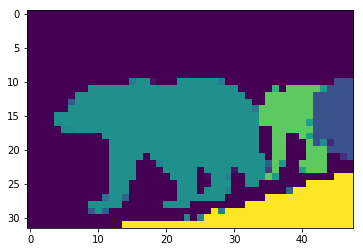

(32, 48)
(80, 120, 3)


In [60]:
plt.imshow(true_images[0])
plt.show()
print(true_images[0].shape)
print(img_clusters[0].shape)

In [61]:
martinIndex(true_images[0], img_clusters[0])

0.9440450430178127

## Loop for martin index

In [88]:
martin_indexes = []
for arrays in range(198): 
    martin_indexes.append(martinIndex(true_images[arrays], img_clusters[arrays]))

martin_indexes

[0.9531581300454842,
 0.9386687998697609,
 0.975690548021832,
 0.9619845128025305,
 0.976115032311928,
 0.9242998693852754,
 0.9196881678265257,
 0.9536937320707106,
 0.9291126393840942,
 0.9688687428418774,
 0.9652949082905754,
 0.9657070517291476,
 0.9634673142668634,
 0.9775326238593808,
 0.9645302883080452,
 0.9471381836852987,
 0.9575239876536871,
 0.9351218800829236,
 0.9485347356783878,
 0.9615136967874263,
 0.9603027467849098,
 0.9651232858981007,
 0.9810713296469769,
 0.94781913480243,
 0.9387890431562459,
 0.9309429542121139,
 0.9405033346016668,
 0.9323552069672713,
 0.9169049997502826,
 0.9412301509849574,
 0.9546611583105047,
 0.9710700787366994,
 0.9604573137158186,
 0.9442043112969819,
 0.9825433430933238,
 0.9577736433698214,
 0.9085667204356935,
 0.9748990287492508,
 0.978691892363629,
 0.9355644611164822,
 0.9317375533246764,
 0.979701838687876,
 0.9416138026391353,
 0.9592755338348189,
 0.9446581116881011,
 0.9615255595126335,
 0.9776872858770325,
 0.9698908449402842

In [89]:
mean = np.mean(martin_indexes)
std = np.std(martin_indexes)
print(mean)
print(std)

0.9513591819468019
0.02505847386516883
